In [27]:
# !pip uninstall tensorflow
# !pip install tensorflow


In [28]:
# vgg19_train.py
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
# ==== 1. Paths ====
train_dir = "dataset/train"
val_dir   = "dataset/test"

In [30]:
# ==== 2. Basic Config ====
IMG_SIZE = (128, 128)
BATCH_SIZE = 10
NUM_CLASSES = 2
LEARNING_RATE = 1e-4
DROPOUT_RATE = 0.3
EPOCHS = 25

In [31]:
!rm -rf dataset/train/.ipynb_checkpoints
# rm -rf dataset/val/.ipynb_checkpoints
!rm -rf dataset/test/.ipynb_checkpoints


In [32]:
# ==== 3. Data Generators ====
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 51 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [33]:
# ==== 4. Base Model (VGG19 pretrained on ImageNet) ====
base = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))
for layer in base.layers:
    layer.trainable = False

x = Flatten()(base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)  # <-- ONLY ONE NEURON for binary classification

model = Model(inputs=base.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',            # <-- Binary loss
    metrics=['accuracy']
)


model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             

 Total params: 22,122,049 (84.39 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [34]:
# ==== 5. Callbacks ====
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ModelCheckpoint("best_vgg19_model.h5", save_best_only=True, monitor='val_accuracy')
]

In [35]:
# ==== 6. Training ====
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4206 - loss: 0.9245

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4250 - loss: 0.9216 - val_accuracy: 0.7619 - val_loss: 0.6286
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9115 - loss: 0.4714

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9102 - loss: 0.4635 - val_accuracy: 0.8095 - val_loss: 0.5292
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8847 - loss: 0.3365

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8900 - loss: 0.3331 - val_accuracy: 0.9524 - val_loss: 0.4075
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9515 - loss: 0.2252

6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9528 - loss: 0.2252 - val_accuracy: 1.0000 - val_loss: 0.3231
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9668 - loss: 0.1611 - val_accuracy: 1.0000 - val_loss: 0.2650
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9944 - loss: 0.0974 - val_accuracy: 1.0000 - val_loss: 0.2240
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9909 - loss: 0.1022 - val_accuracy: 1.0000 - val_loss: 0.2092
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0802 - val_accuracy: 0.9524 - val_loss: 0.2007
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9944 - loss: 0.0907 - val_accuracy: 1.0000 - val_loss: 0.1634
Epoch 10/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9863 - loss: 0.0535 - val_accuracy: 0.9524 - val_loss: 0.1715
Epoch 11/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0487 - val_accuracy: 1.0000 - val_loss: 0.1426
Epoch 12/25
6/6 ━

In [36]:
# ==== 7. Fine-tuning (Optional) ====
# Unfreeze some upper convolutional layers and train with lower LR
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_ft = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=callbacks
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 0.0639
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 1.0000 - val_loss: 0.0676
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0715
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0749
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0694
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 0.0651
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0600
Epoch 9/

/tmp/ipython-input-812109365.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_labels[int(y_pred[idx])]


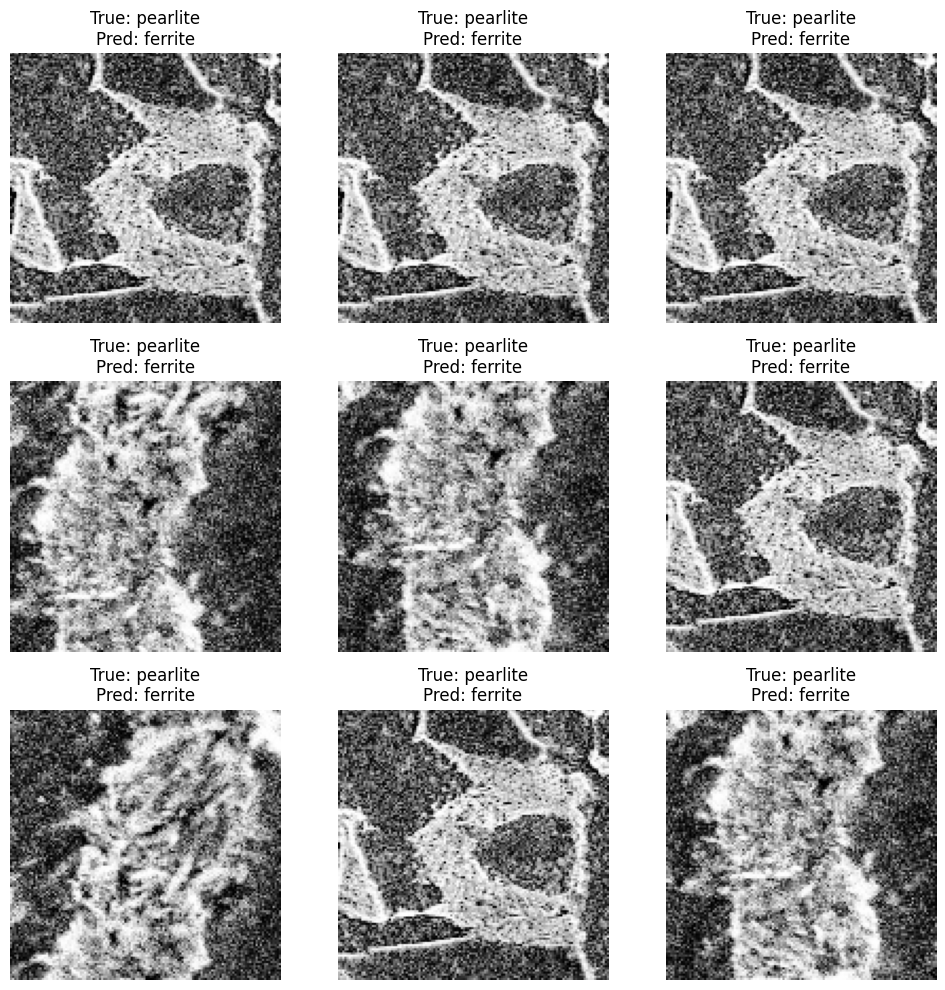

In [37]:
import matplotlib.pyplot as plt
import random

class_labels = list(test_gen.class_indices.keys())
images, labels = next(test_gen)

plt.figure(figsize=(10,10))
for i in range(9):
    idx = random.randint(0, len(images)-1)
    img = images[idx]
    true_label = class_labels[int(labels[idx])]
    pred_label = class_labels[int(y_pred[idx])]
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [38]:
print(train_gen.class_indices)


{'ferrite': 0, 'pearlite': 1}


In [39]:
# ==== 8. Save Final Model ====
model.save("vgg19_steel_microstructure_final.h5")

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_gen = val_datagen.flow_from_directory(
    "dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

y_pred = (model.predict(test_gen) > 0.5).astype("int32")
y_true = test_gen.classes

print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))


Found 21 images belonging to 2 classes.
2/3 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
              precision    recall  f1-score   support

     ferrite       1.00      1.00      1.00        11
    pearlite       1.00      1.00      1.00        10

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "ferr.33.jpg"   # path to your image
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prob = model.predict(img_array)[0][0]
pred = "pearlite" if prob > 0.5 else "ferrite"
print(f"Predicted class: {pred} (prob={prob:.3f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted class: ferrite (prob=0.173)
